## Install pystan using pip install pystan or conda install -c conda-forge pystan

In [102]:
import stan as stan
import nest_asyncio
import numpy as np
import matplotlib.pyplot as plt
nest_asyncio.apply()

# Multivariate normal example

In [112]:
# mvn 
mvn_code = """
data {
  int d;
}

parameters {
  vector[d] x;
}

model {
  x ~ std_normal();
}"""

mvn_data = {"d":8}
posterior = stan.build(mvn_code, data = mvn_data )

Building: found in cache, done.


In [116]:
fit = posterior.sample(num_chains=4, num_samples=1000)

Sampling:   0%
Sampling:  25% (2000/8000)
Sampling:  50% (4000/8000)
Sampling:  75% (6000/8000)
Sampling: 100% (8000/8000)
Sampling: 100% (8000/8000), done.
Messages received during sampling:
  Gradient evaluation took 4e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.04 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 7e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.07 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 8e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.08 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.03 seconds.
  Adjust your expectations accordingly!


In [117]:
df = fit.to_frame()

## Trace plot

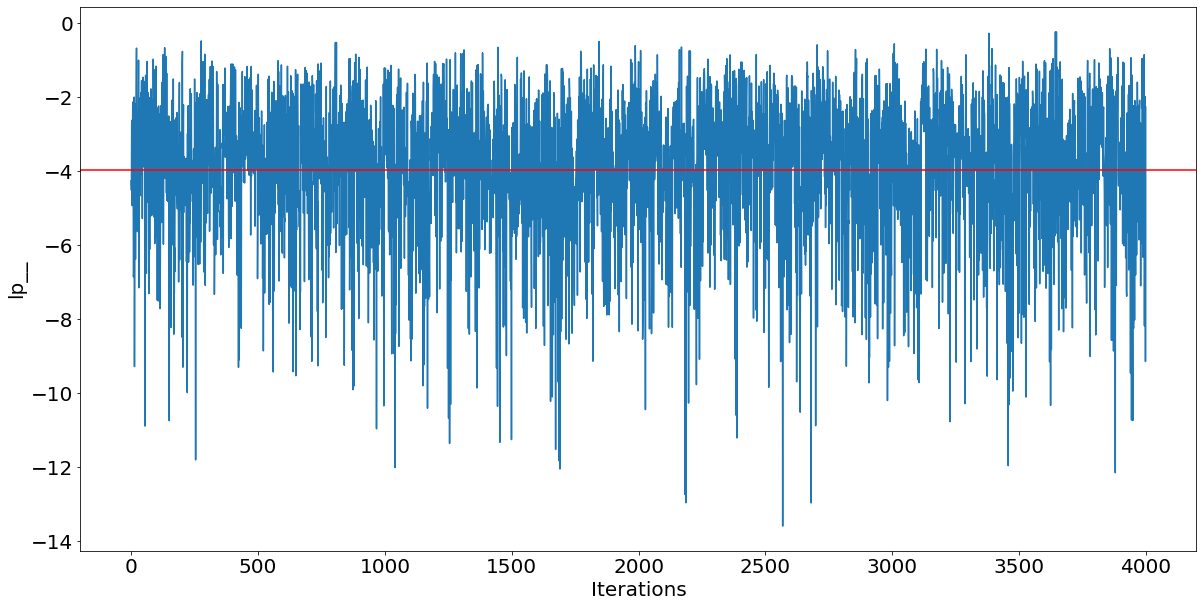

In [119]:
df = fit.to_frame()
plt.figure(figsize = (20,10))
plt.plot(df['lp__'])
plt.axhline(y=np.mean(df['lp__']), color='r', linestyle='-')
plt.xlabel('Iterations', fontsize=20)
plt.ylabel('lp__', fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.show()

## Histogram

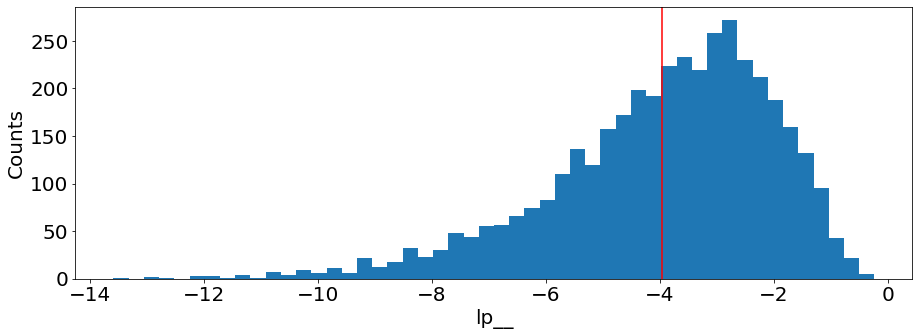

In [120]:
plt.figure(figsize = (15,5))
plt.hist(df['lp__'], bins = 50)
plt.xlabel('lp__', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.axvline(np.mean(df['lp__']), color='r', linestyle='-')
plt.show()

# Eight schools example

In [10]:
school_code_cp = """data {
  int<lower=0> J;
  real y[J];
  real<lower=0> sigma[J];
}

parameters {
  real mu;
  real<lower=0> tau;
  real theta[J];
}

model {
  mu ~ normal(0, 5);
  tau ~ cauchy(0, 5);
  theta ~ normal(mu, tau);
  y ~ normal(theta, sigma);
}"""
eight_schools_cp_data = {"J": 8,
                "y": [28,  8, -3,  7, -1,  1, 18, 12],
                "sigma": [15, 10, 16, 11,  9, 11, 10, 18]}
posterior = stan.build(school_code_cp, data = eight_schools_cp_data)

Building: 0.1s
Building: 0.2s
Building: 0.3s


cc1plus: warning: command line option '-Wstrict-prototypes' is valid for C/ObjC but not for C++


Building: 0.4s
Building: 0.5s
Building: 0.6s
Building: 0.7s
Building: 0.8s
Building: 0.9s
Building: 1.0s
Building: 1.1s
Building: 1.2s
Building: 1.3s
Building: 1.4s
Building: 1.5s
Building: 1.6s
Building: 1.7s
Building: 1.8s
Building: 1.9s
Building: 2.0s
Building: 2.1s
Building: 2.2s
Building: 2.3s
Building: 2.4s
Building: 2.5s
Building: 2.7s
Building: 2.8s
Building: 2.9s
Building: 3.0s
Building: 3.1s
Building: 3.2s
Building: 3.3s
Building: 3.4s
Building: 3.5s
Building: 3.6s
Building: 3.7s
Building: 3.8s
Building: 3.9s
Building: 4.0s
Building: 4.1s
Building: 4.2s
Building: 4.3s
Building: 4.4s
Building: 4.5s
Building: 4.6s
Building: 4.7s
Building: 4.8s
Building: 4.9s
Building: 5.0s
Building: 5.1s
Building: 5.2s
Building: 5.3s
Building: 5.4s
Building: 5.5s
Building: 5.6s
Building: 5.7s
Building: 5.8s
Building: 5.9s
Building: 6.0s
Building: 6.1s
Building: 6.2s
Building: 6.3s
Building: 6.4s
Building: 6.5s
Building: 6.6s
Building: 6.7s
Building: 6.8s
Building: 6.9s


In file included from /home/plbmxgrkjz/software/miniconda3/lib/python3.8/site-packages/httpstan/include/stan/model/model_header.hpp:7,
                 from /home/plbmxgrkjz/.cache/httpstan/4.7.0/models/jb5xecux/model_jb5xecux.cpp:2:
/home/plbmxgrkjz/software/miniconda3/lib/python3.8/site-packages/httpstan/include/stan/io/dump.hpp: In member function 'virtual std::vector<std::complex<double> > stan::io::dump::vals_c(const string&) const':
/home/plbmxgrkjz/software/miniconda3/lib/python3.8/site-packages/httpstan/include/stan/io/dump.hpp:694:52: warning: comparison of integer expressions of different signedness: 'int' and 'std::vector<double, std::allocator<double> >::size_type' {aka 'long unsigned int'} [-Wsign-compare]
  694 |       for (comp_iter = 0, real_iter = 0; real_iter < val_r->second.first.size();
      |                                          ~~~~~~~~~~^~~~~~~~~~~~~~~~~~~~~~~~~~~~
/home/plbmxgrkjz/software/miniconda3/lib/python3.8/site-packages/httpstan/include/stan/io/dump

Building: 7.0s
Building: 7.1s
Building: 7.2s
Building: 7.3s


/home/plbmxgrkjz/.cache/httpstan/4.7.0/models/jb5xecux/model_jb5xecux.cpp: In instantiation of 'void model_jb5xecux_namespace::model_jb5xecux::transform_inits_impl(VecVar&, VecI&, VecVar&, std::ostream*) const [with VecVar = std::vector<double, std::allocator<double> >; VecI = std::vector<int>; stan::require_std_vector_t<T>* <anonymous> = 0; stan::require_vector_like_vt<std::is_integral, VecI>* <anonymous> = 0; std::ostream = std::basic_ostream<char>]':
/home/plbmxgrkjz/.cache/httpstan/4.7.0/models/jb5xecux/model_jb5xecux.cpp:391:69:   required from here
/home/plbmxgrkjz/.cache/httpstan/4.7.0/models/jb5xecux/model_jb5xecux.cpp:215:11: warning: variable 'pos__' set but not used [-Wunused-but-set-variable]
  215 |       int pos__ = std::numeric_limits<int>::min();
      |           ^~~~~


Building: 7.4s
Building: 7.5s
Building: 7.6s
Building: 7.7s
Building: 7.8s
Building: 7.9s
Building: 8.0s
Building: 8.2s
Building: 8.3s
Building: 8.4s
Building: 8.5s
Building: 8.6s
Building: 8.7s
Building: 8.8s
Building: 8.9s
Building: 9.0s
Building: 9.1s


In file included from /home/plbmxgrkjz/software/miniconda3/lib/python3.8/site-packages/httpstan/include/stan/math/prim/err/check_not_nan.hpp:5,
                 from /home/plbmxgrkjz/software/miniconda3/lib/python3.8/site-packages/httpstan/include/stan/math/prim/err/check_2F1_converges.hpp:5,
                 from /home/plbmxgrkjz/software/miniconda3/lib/python3.8/site-packages/httpstan/include/stan/math/prim/err.hpp:4,
                 from /home/plbmxgrkjz/software/miniconda3/lib/python3.8/site-packages/httpstan/include/stan/math/rev/core/profiling.hpp:9,
                 from /home/plbmxgrkjz/software/miniconda3/lib/python3.8/site-packages/httpstan/include/stan/math/rev/core.hpp:53,
                 from /home/plbmxgrkjz/software/miniconda3/lib/python3.8/site-packages/httpstan/include/stan/math/rev.hpp:8,
                 from /home/plbmxgrkjz/software/miniconda3/lib/python3.8/site-packages/httpstan/include/stan/math.hpp:19,
                 from /home/plbmxgrkjz/software/miniconda3

Building: 9.2s
Building: 9.3s
Building: 9.4s
Building: 9.5s
Building: 9.6s
Building: 9.7s
Building: 9.8s
Building: 9.9s
Building: 10.0s
Building: 10.1s
Building: 10.2s
Building: 10.3s
Building: 10.4s
Building: 10.5s
Building: 10.6s
Building: 10.7s
Building: 10.8s
Building: 10.9s
Building: 11.0s
Building: 11.1s
Building: 11.2s
Building: 11.3s
Building: 11.4s
Building: 11.5s
Building: 11.6s
Building: 11.7s
Building: 11.8s
Building: 11.9s
Building: 12.0s
Building: 12.1s
Building: 12.2s
Building: 12.3s
Building: 12.4s
Building: 12.5s
Building: 12.6s
Building: 12.7s
Building: 12.8s
Building: 12.9s
Building: 13.0s


Building: 13.1s, done.
Messages from stanc:
Warning in '/tmp/httpstan_l1p7f5fg/model_jb5xecux.stan', line 3, column 2: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/tmp/httpstan_l1p7f5fg/model_jb5xecux.stan', line 4, column 2: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/tmp/httpstan_l1p7f5fg/model_jb5xecux.stan', line 10, column 2: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to

## Fit the model 

In [13]:
fit = posterior.sample(num_chains=4, num_samples=1000)

Sampling:   0%
Sampling:  25% (2000/8000)
Sampling:  50% (4000/8000)
Sampling:  75% (6000/8000)
Sampling: 100% (8000/8000)
Sampling: 100% (8000/8000), done.
Messages received during sampling:
  Gradient evaluation took 9e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.09 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.12 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 9e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.09 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.1 seconds.
  Adjust your expectations accordingly!


## Trace plots

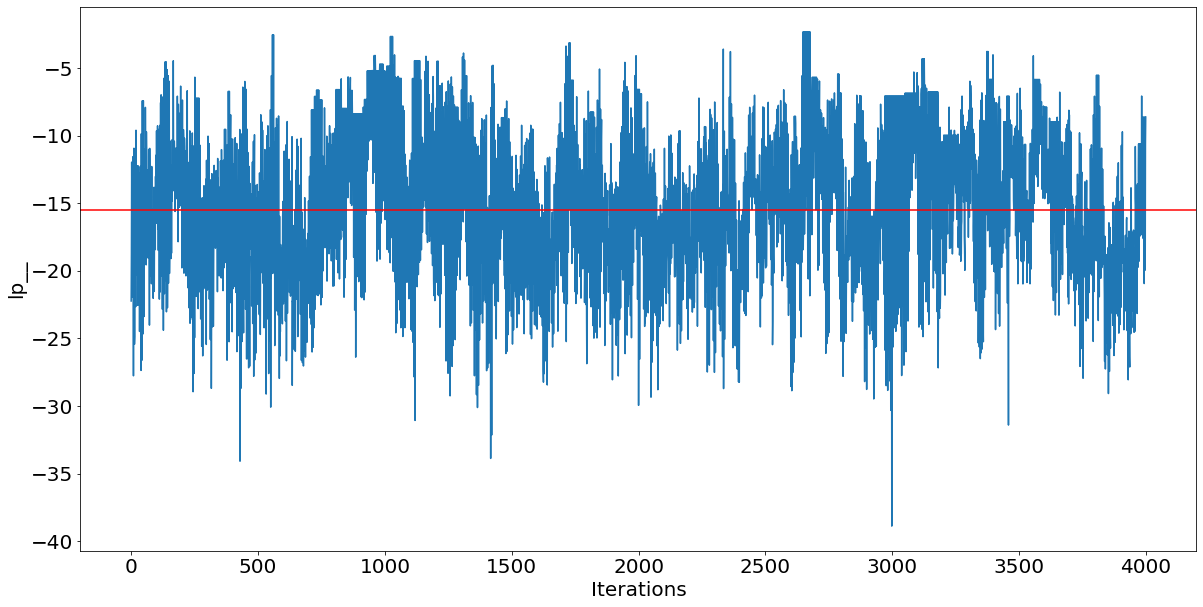

In [48]:
df = fit.to_frame()
plt.figure(figsize = (20,10))
plt.plot(df['lp__'])
plt.axhline(y=np.mean(df['lp__']), color='r', linestyle='-')
plt.xlabel('Iterations', fontsize=20)
plt.ylabel('lp__', fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.show()

## Histogram

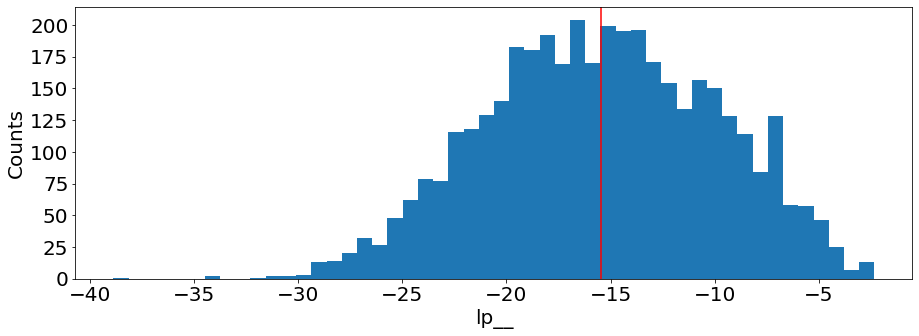

In [47]:
plt.figure(figsize = (15,5))
plt.hist(df['lp__'], bins = 50)
plt.xlabel('lp__', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.axvline(np.mean(df['lp__']), color='r', linestyle='-')
plt.show()

# Eight schools ncp

In [98]:
school_code_ncp= """data {
  int<lower=0> J;
  real y[J];
  real<lower=0> sigma[J];
}

parameters {
  real mu;
  real<lower=0> tau;
  real theta_tilde[J];
}

transformed parameters {
  real theta[J];
  for (j in 1:J)
    theta[j] = mu + tau * theta_tilde[j];
}

model {
  mu ~ normal(0, 5);
  tau ~ cauchy(0, 5);
  theta_tilde ~ normal(0, 1);
  y ~ normal(theta, sigma);
}"""

eight_schools_ncp_data = {"J": 8,
                "y": [28,  8, -3,  7, -1,  1, 18, 12],
                "sigma": [15, 10, 16, 11,  9, 11, 10, 18]}
posterior = stan.build(school_code_ncp, data = eight_schools_ncp_data )

Building: found in cache, done.
Messages from stanc:
Warning in '/tmp/httpstan_56a7tesh/model_c4uxfxxi.stan', line 3, column 2: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/tmp/httpstan_56a7tesh/model_c4uxfxxi.stan', line 4, column 2: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/tmp/httpstan_56a7tesh/model_c4uxfxxi.stan', line 10, column 2: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-forma

## Fit the model 

In [100]:
fit = posterior.sample(num_chains=4, num_samples=1000)
df = fit.to_frame()

Sampling:   0%
Sampling:  25% (2000/8000)
Sampling:  50% (4000/8000)
Sampling:  75% (6000/8000)
Sampling: 100% (8000/8000)
Sampling: 100% (8000/8000), done.
Messages received during sampling:
  Gradient evaluation took 1.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.15 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.35 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.48 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.1 seconds.
  Adjust your expectations accordingly!


## Trace plots

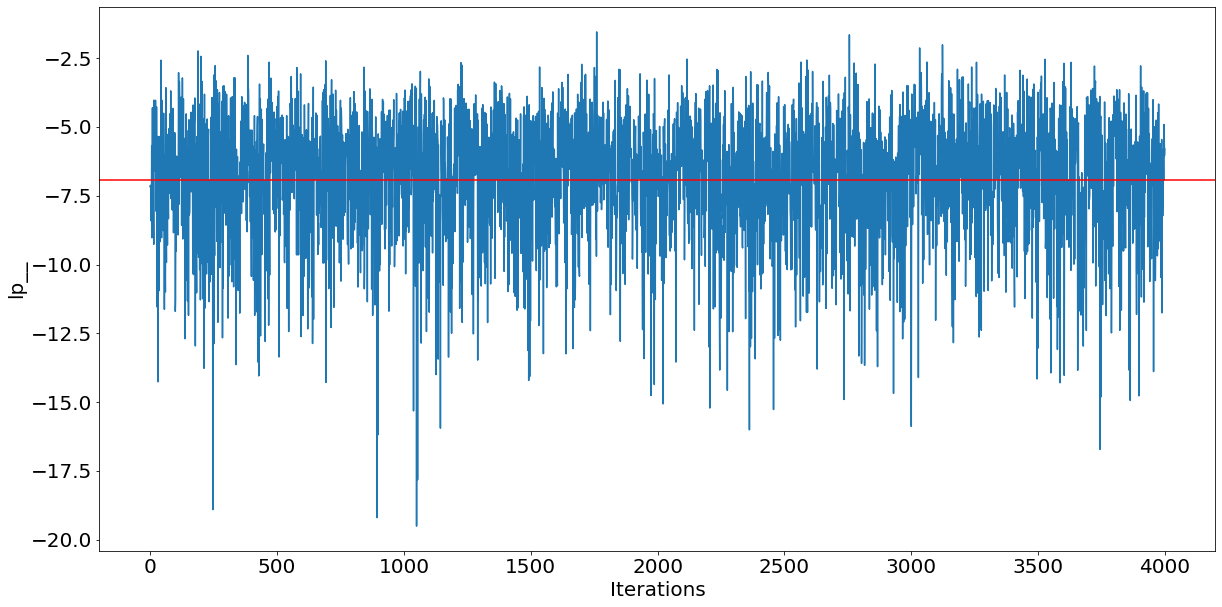

In [51]:
df = fit.to_frame()
plt.figure(figsize = (20,10))
plt.plot(df['lp__'])
plt.axhline(y=np.mean(df['lp__']), color='r', linestyle='-')
plt.xlabel('Iterations', fontsize=20)
plt.ylabel('lp__', fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.show()

## Histogram

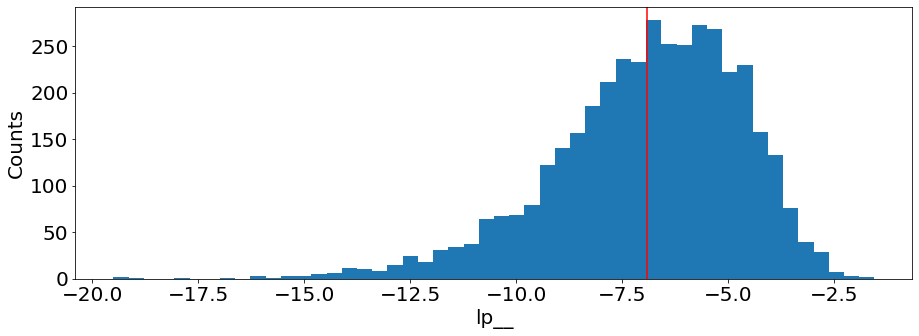

In [52]:
plt.figure(figsize = (15,5))
plt.hist(df['lp__'], bins = 50)
plt.xlabel('lp__', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.axvline(np.mean(df['lp__']), color='r', linestyle='-')
plt.show()

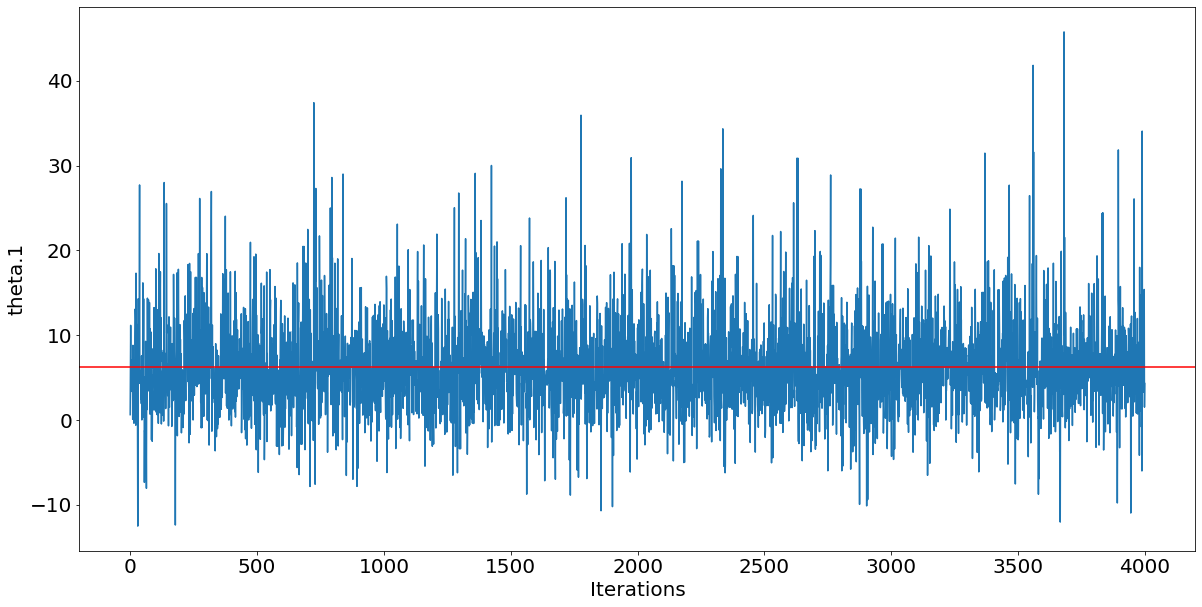

In [54]:
df = fit.to_frame()
plt.figure(figsize = (20,10))
plt.plot(df['theta.1'])
plt.axhline(y=np.mean(df['theta.1']), color='r', linestyle='-')
plt.xlabel('Iterations', fontsize=20)
plt.ylabel('theta.1', fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.show()